<a href="https://colab.research.google.com/github/taesangeom/SK-T-Academy/blob/main/Coding_Test/18_%ED%83%90%EC%83%89_%EC%96%B4%EB%A6%84%EC%96%BC%EC%9D%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

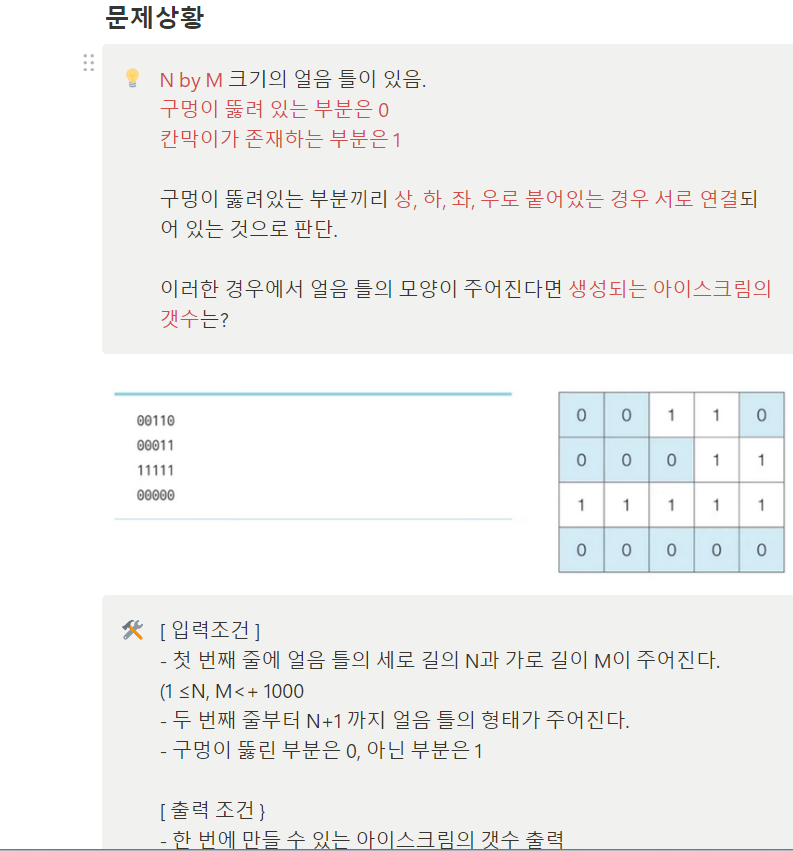

In [ ]:
from collections import deque

In [ ]:
#내버전 _> 나는 BFS로 풀었음

n,m=map(int,input().split())
mapp=[]
for i in range(n):
    mapp.append(list(map(int,input())))
move={"L":[0,-1],"R":[0,1],"U":[-1,0],"D":[1,0]}
pos=deque() #할일
#mapp에 한일 바로 갱신 , 간 곳은 1로 표기하면서 (도장)

cnt=0
for i in range(n):
    for j in range(m):
        if mapp[i][j]==0: #똑같은 bfs이지만, 초기값에 해당하는 거 다 찾아야함
            pos.append([i,j])
            while pos:
                x,y=pos.popleft()
                for mv in move:   #동일한 bfs + LRUD이동형태
                    nx=x+move[mv][0]
                    ny=y+move[mv][1]
                    if 0<=nx<n and 0<=ny<m and mapp[nx][ny]==0:
                        mapp[nx][ny]=1
                        pos.append([nx,ny])
            cnt+=1 #인접한 0 다 찾았을때

print(cnt)


15 14
00000111100000
11111101111110
11011101101110
11011101100000
11011111111111
11011111111100
11000000011111
01111111111111
00000000011111
01111111111000
00011111111000
00000001111000
11111111110011
11100011111111
11100011111111
8


In [ ]:
#강사님 버전은 DFS 재귀함수로 구현

In [ ]:
# 고민1) 왜 이 문제가 탐색인가?
#       ==> 카운팅의 조건이 탐색이 필요함!!
#           모든 좌표점에서 시작을 한다고 했을 때
#           연결되는 것들을 다 탐색을 해야하는 것!!!!!
#           (할 일 : LRUD계속계속 이동!!!) : 니가 알아서 다 찾아죠!!! 탐색!!
#           (한 일 : 지도에 0---> 1로 갱신!!!)

# 고민2) 탐색이라고 한다면,,,어떤 탐색(DFS/BFS)중 뭐가 좋을까?
#       ==> 이 친구는 그닥 상관이 없음!!!
#           Why방문해서 도장만 받으면 끝!!!!!!
#           DFS/BFS나 그렇게 크게 문제는 없음!!!!!
#       ==> DFS로 진행을 해볼려고 함!! BFS는 직접해보세요..
#           DFS : stack ---> 재귀함수

# 고민3) 이 문제의 해결하는 큰 틀이 무엇일지?
#      ==> 카운팅!!! 특정 조건을 만족할 때 마다 카운팅!!!!
#          카운팅에 대한 조건 : 0을 LRUD연결된 덩어리를 다 탐색하고 오면
#                               다 1로 값을 갱신하면,,,,
#                              ==> 그 때 마다 카운팅!!!!
#      ==> 시작점이 (0,0)~~~~(n-1, m-1)
#          이 모든 점에서 탐색을 시작을 하면서 카운팅!!!!!!

In [ ]:
# 참고) 이 문제의 차이점!!
# ==> 모든 (n,m)의 셀에서 탐색이 가능한지 체크1!!!!!
#     출발점의 후보들이 1개로 고정된 것이 아니라
#     주어진 판 전체에 대해서 돌아가면서 시도를 해야함!!!!!!!!
# ==> (n,m) 지점에서 출발이 가능하다면,,,,,다 탐색을 하고...
#     그 탐색이 다 끝나면,,,,,,카운팅 +1 갱신해주세요!!!!!!

In [ ]:
# 시도1) BFS : 큰 틀만 체크!!!!
# 큰틀 : 모든 좌표에서 시작한다고 세팅!!!
#             for i in 가로줄:
#                 for j in 세로줄 :
#                     ==> 2D 상의 임의의 (i,j)모든 출발점을 세팅!!!
#                     if (i,j)로 시작할 수 있다면,,,,
#                            다 탐색이 끝날 때까지 하고,,,
#                            카운팅 +1 갱신!!!!

In [ ]:
#DFS 재귀함수 버전

def dfs_recursive( row, col):
    # 기능 중심!!!!!
    # 기능1) 주어진 점이 in/out 체크!!!!!!
    if row <=-1 or row >=n or col <= -1 or col >=m: # out
        return False
    # 기능2) 인바운드이면,,,,---> 얼음을 얼릴 수 있는지 체크!!!!
    if graph[row][col] == 0 :
        # 2-1) 도장찍기
        graph[row][col] = 1
        # 2-2) 더 갈 곳이 어딘지 할 일을 추가!!!!:
        #      가서 할 일들은 위에서 지정한 것들과 동일 & 단, 시작 위치만 달라요..
        dfs_recursive(row, col-1) # L : L막히기 전까지 쭉~~L으로 달릴려고 함!!
        dfs_recursive(row, col+1) # R 쭉 갔다가 돌아옴
        dfs_recursive(row-1,col) # U 쭉 갔다가 돌아옴
        dfs_recursive(row+1,col) # D 쭉 갔다가 돌아옴
        # 혹시 문제에서 : L을 먼저 탐색하세요.....
        # 탐색의 순서를 지정하게 되면,,,순서에 맞춰서 세팅!!!!!!!!!
        # DFS와 정확하게 탐색의 방식이 동일함!!!!
        return True
    return False

In [ ]:
# 정리!!!!!
# DFS / BFS 모두 가능한 문제
# ==> 본인이 편한 스타일로 선택해서 하시면 됨!!!!!

# DFS 사용이 가능하다!!! ==> Stack!!!! --> 재귀함수를 써도 됨!!!
# 1) 정의대로 탐색 기본으로 구현: append(), pop()
# 2) 기능 중심으로 재귀함수로 구현이 가능함!!!

# BFS 사용이 가능하다!! ==> queue ==> deque
# ==> 거리, 출발점에 순서 중요할 떄
#     : 출발점에서 뭔가 점진적으로 진행을 해야하는 경우들의 상황!!!
# ==> 최단거리 문제로 일반화 : 다익스트라 알고리즘!!!!!
#     (거리가 1로 일정하거나 하는 간단한 경우 : BFS로 처리가 가능!!)
# ==> 속도 이슈 : deque : append(), popleft()
# 주의!!!) 절대로 재귀함수를 사용하시면 안 됨!!!!!!!!


# ++